In [1]:
import numpy
print(numpy.__version__)

1.26.3


In [1]:
from tssb.utils import load_time_series_segmentation_datasets
from tssb.evaluation import covering
from claspy.segmentation import BinaryClaSPSegmentation
from claspy.data_loader import load_tssb_dataset
import matplotlib.pyplot as plt
from tssb.utils import visualize_time_series
import pandas as pd
import numpy as np
import csv


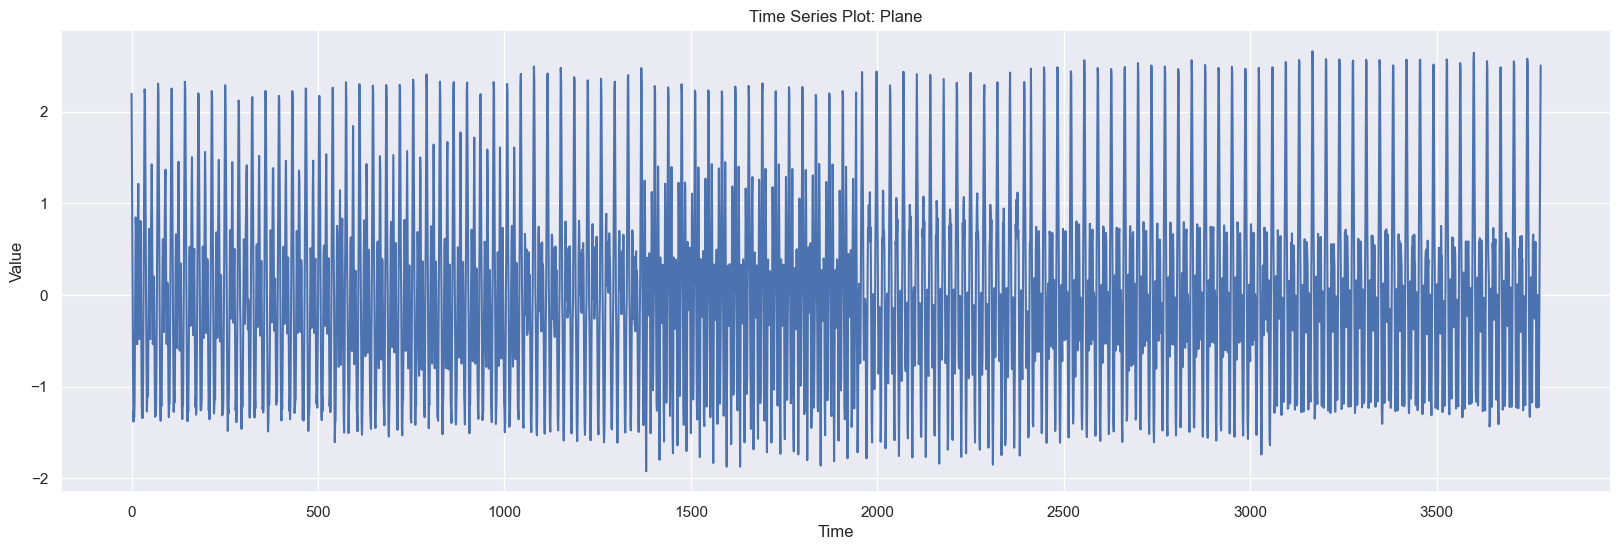

Time Series: Plane: True Change Points: [ 540 1044 1368 1944 2412 3060], Found Change Points: [532, 1047, 1166, 1374, 1942, 2411, 3067], Score: 0.9549398283377354


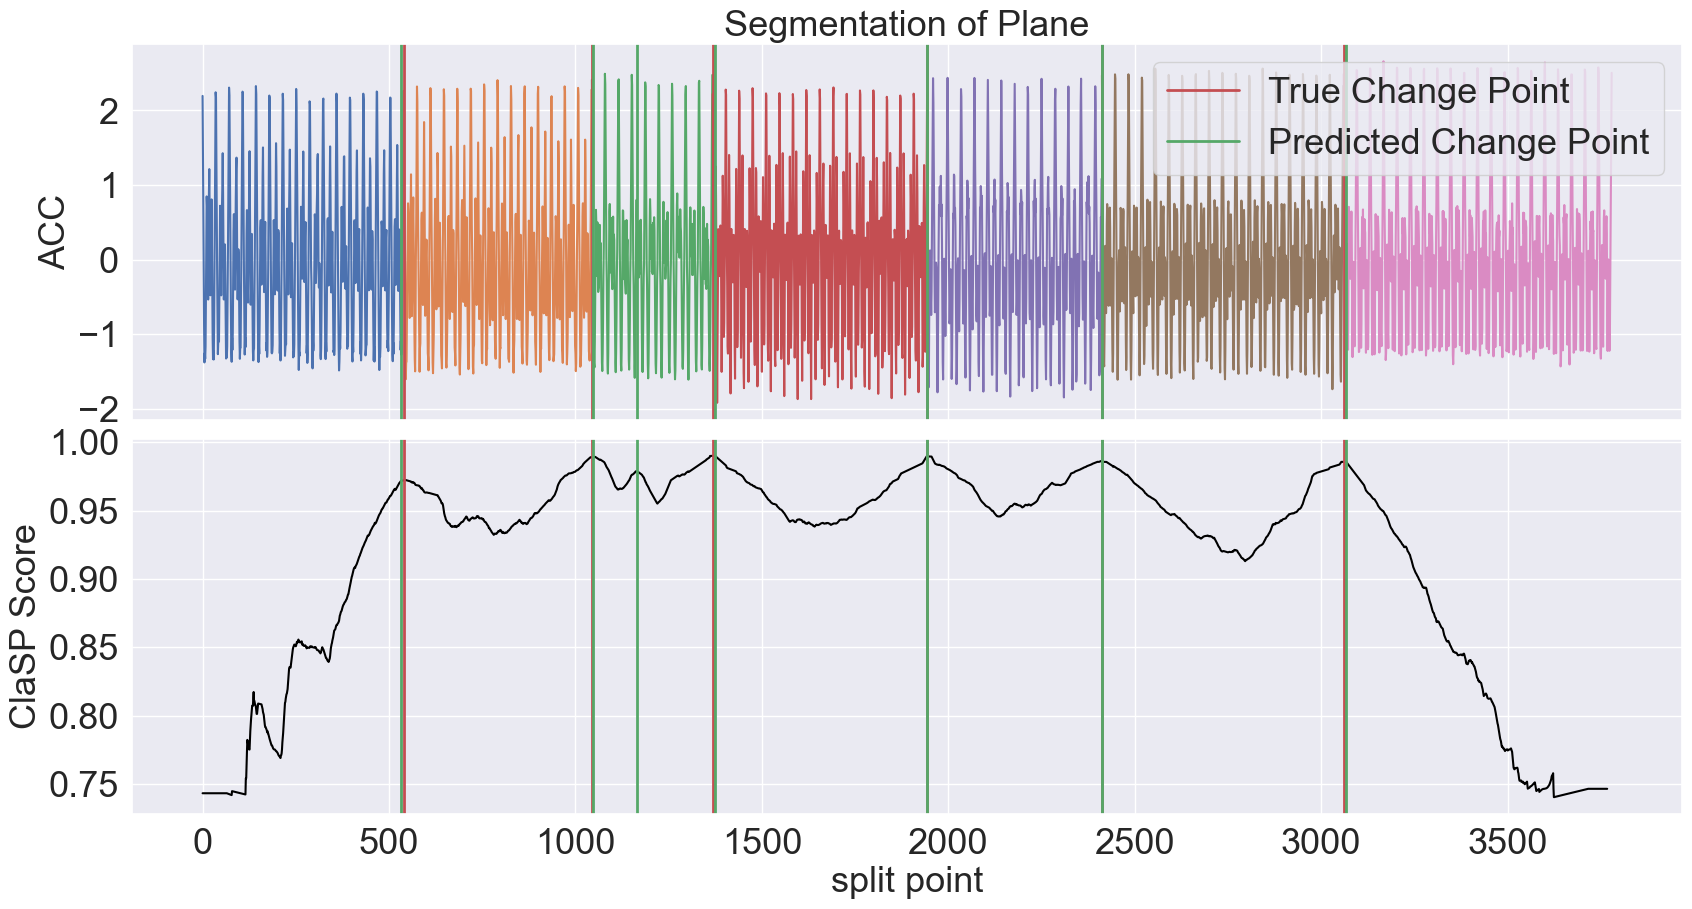

In [5]:
tssb = load_time_series_segmentation_datasets("Plane")
clasp = BinaryClaSPSegmentation()
for _, (ts_name, window_size, cps, ts) in tssb.iterrows():
    found_cps = clasp.fit_predict(ts)
    score = covering({0: cps}, found_cps, ts.shape[0])
    
    plt.figure(figsize=(20, 6))
    plt.plot(ts)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title(f"Time Series Plot: {ts_name}")
    plt.grid(True)
    plt.show()
    
    print(f"Time Series: {ts_name}: True Change Points: {cps}, Found Change Points: {found_cps.tolist()}, Score: {score}")
    clasp.plot(gt_cps=cps, heading=f"Segmentation of {ts_name}", ts_name="ACC", file_path="segmentation_example.png") 

From Just looking at the data when its plotted, I cannot tell when the data changes from one state to the next. With this dataset, claspy is getting a covering score of .486. This is not a very goo score as the range of covering scores is [0, 1]

In [17]:
tssb = load_time_series_segmentation_datasets()
tssb

,dataset,window_size,change_points,time_series
0,Adiac,10,"[572, 1012, 1232]","[1.681146, 1.383394, 1.029389, 0.688386, 0.354..."
1,ArrowHead,10,[753],"[-1.957721, -1.858082, -1.657983, -1.420794, -..."
2,Beef,50,[705],"[-0.380818, -0.352238, -0.295392, -0.225041, -..."
3,BeetleFly,10,[1280],"[1.114805, 0.774403, 0.477129, 0.115781, -0.24..."
4,BirdChicken,20,[1280],"[1.697714, 1.439032, 1.22287, 0.99708, 0.76479..."
...,...,...,...,...
70,UWaveGestureLibraryX,10,"[600, 1131, 1652, 2193]","[-0.889766, 0.722005, 0.869297, -0.553167, -0...."
71,UWaveGestureLibraryY,10,"[600, 1131, 1652, 2193]","[-1.523467, -0.106794, 0.190361, 0.979247, 0.3..."
72,UWaveGestureLibraryZ,10,"[600, 1131, 1652, 2193]","[-0.527058, 0.416111, -0.524027, 0.41141, 0.12..."
73,WordSynonyms,10,"[202, 2227]","[-1.183581, -0.514028, -0.480539, -0.394855, -..."


In [9]:
tssb = load_time_series_segmentation_datasets('../Data/CricketsX.txt')
print(tssb)
clasp = BinaryClaSPSegmentation(window_size="acf")
for _, (ts_name, window_size, cps, ts) in tssb.iterrows():
    found_cps = clasp.fit_predict(ts)
    score = covering({0: cps}, found_cps, ts.shape[0])    
    print(f"Time Series: {ts_name}: True Change Points: {cps}, Found Change Points: {found_cps.tolist()}, Score: {score}")
    clasp.plot(gt_cps=cps, heading=f"Segmentation of {ts_name}", ts_name="ACC", file_path="segmentation_example.png") 

Empty DataFrame
Columns: [dataset, window_size, change_points, time_series]
Index: []


Time Series: InlineSkate: True Change Points: [1058 2704], Found Change Points: [946, 2201], Score: 0.7730241045390377


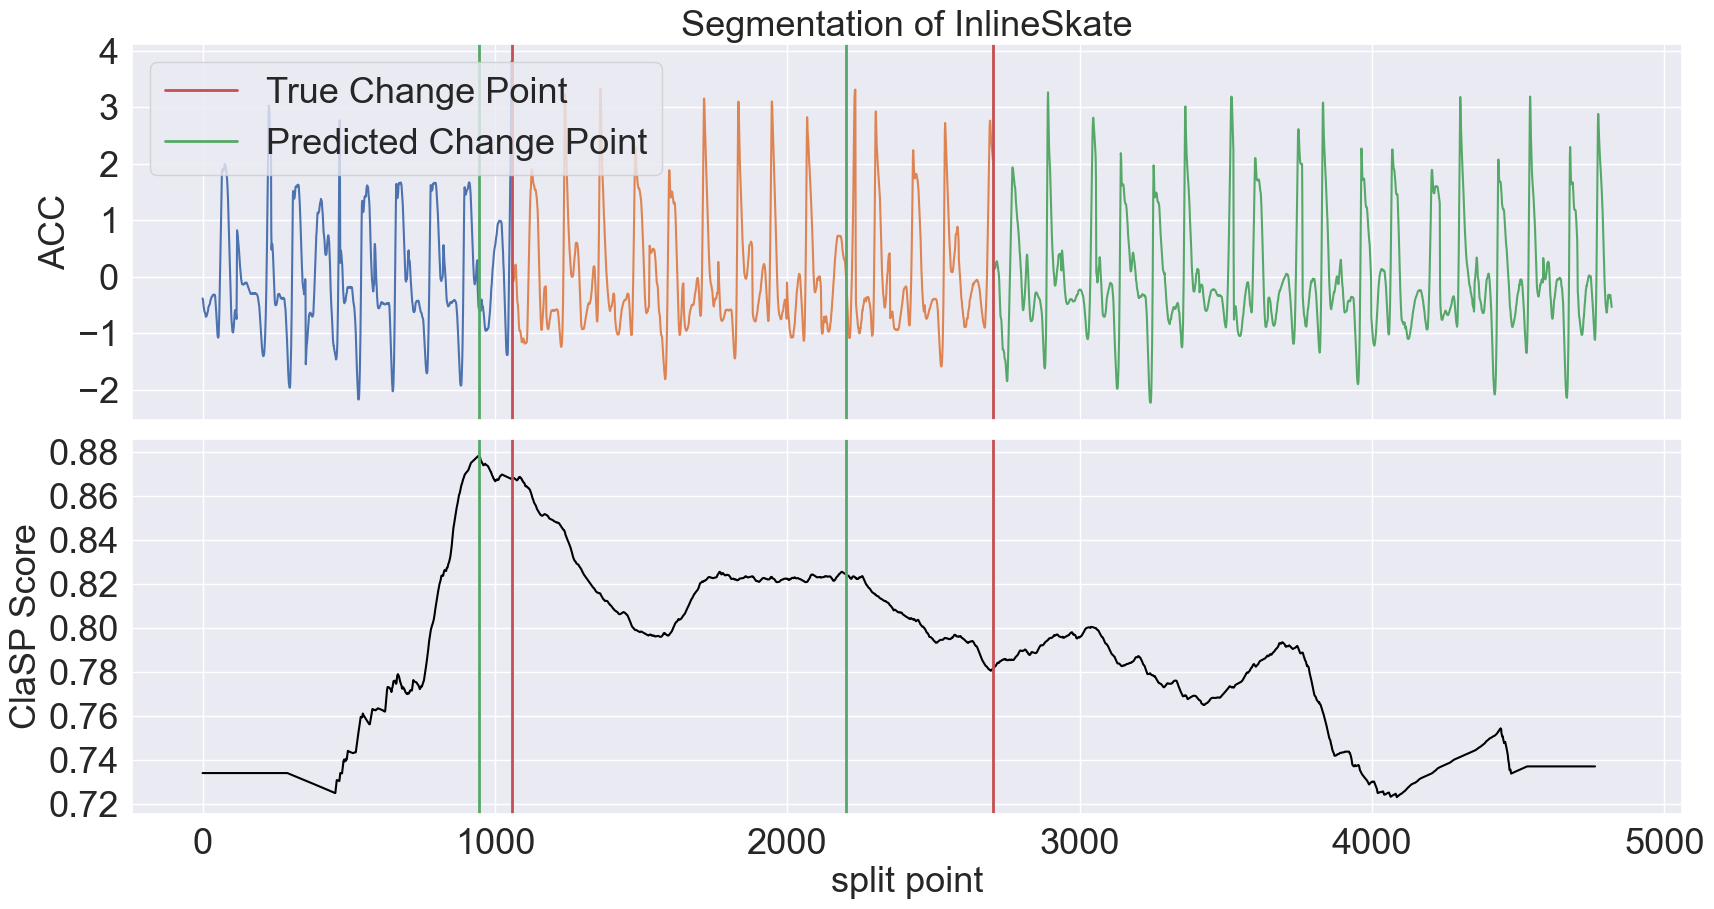

In [6]:
tssb = load_time_series_segmentation_datasets(names=["InlineSkate"])
clasp = BinaryClaSPSegmentation(window_size="fft")
for _, (ts_name, window_size, cps, ts) in tssb.iterrows():
    found_cps = clasp.fit_predict(ts)
    score = covering({0: cps}, found_cps, ts.shape[0])
    
    print(f"Time Series: {ts_name}: True Change Points: {cps}, Found Change Points: {found_cps.tolist()}, Score: {score}")
    clasp.plot(gt_cps=cps, heading=f"Segmentation of {ts_name}", ts_name="ACC", file_path="segmentation_example.png") 

The code above me tests the different window size that claspy comes with, by changing these parameters, we can get a more accurate score depending on the dataset

In [7]:
np.random.seed(1379)
dataset = "Noise"
cps = np.array([400, 1600, 1000])
time_series = np.concatenate((
    np.random.rand(cps[0]),
    1 + np.random.rand(cps[1]),
    -1 + np.random.rand(cps[2])
))
cps = np.cumsum(cps)[:-1]

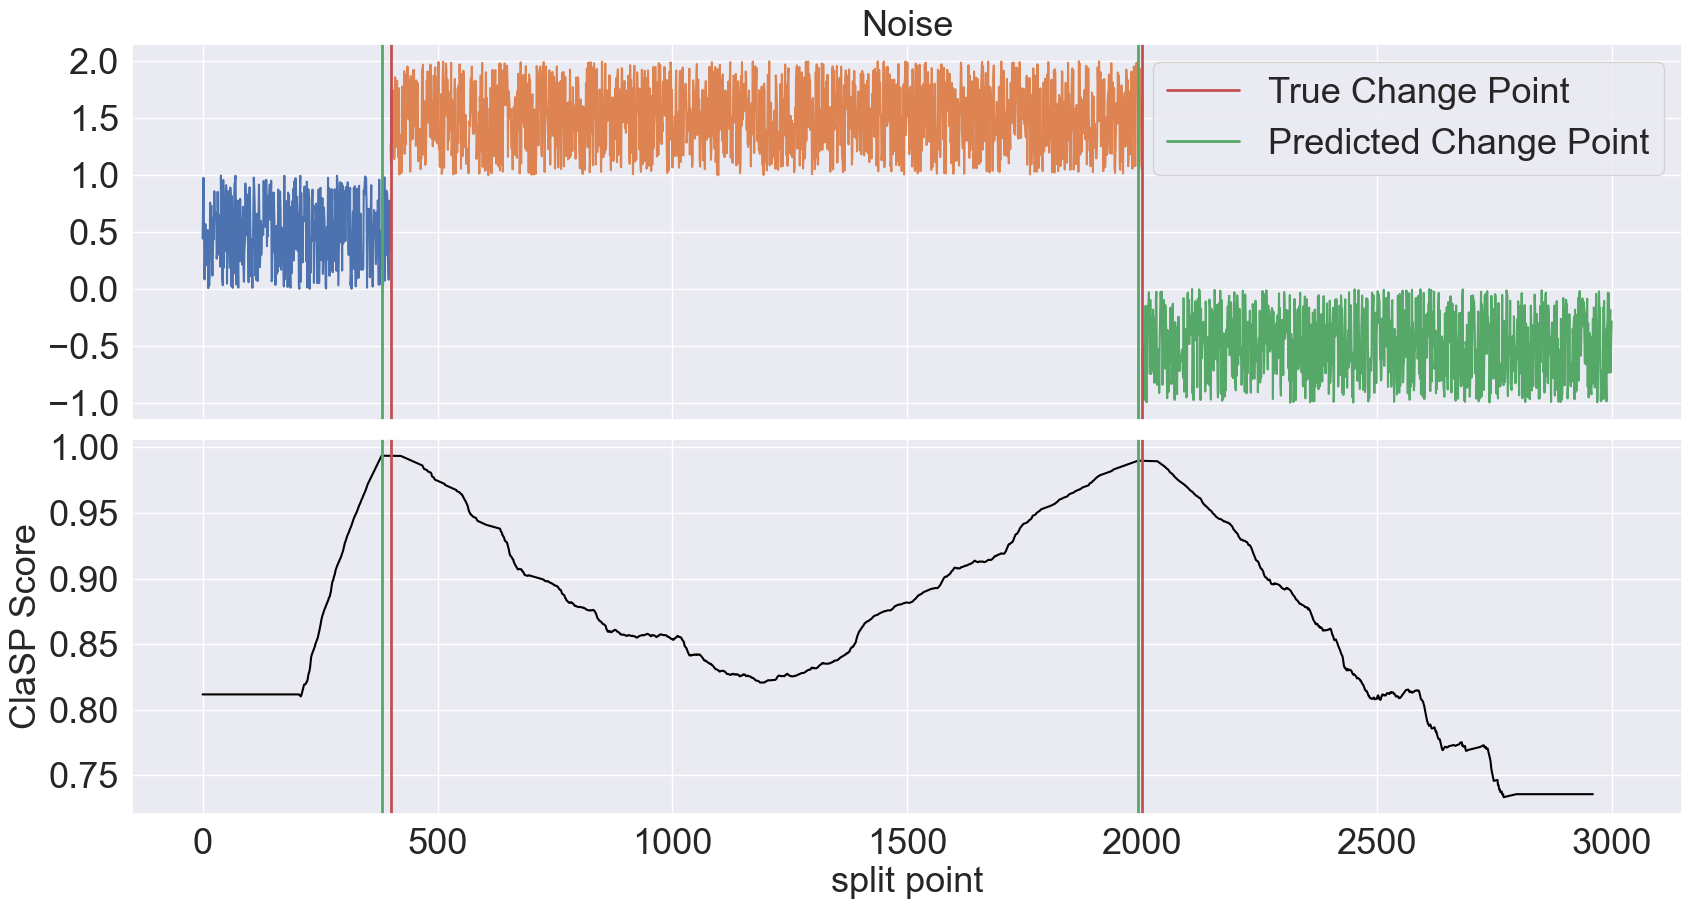

Time Series: InlineSkate: True Change Points: [ 400 2000], Found Change Points: [946, 2201], Score: 0.7730241045390377


In [9]:
clasp = BinaryClaSPSegmentation(distance="euclidean_distance").fit(time_series)
clasp.plot(heading=dataset, gt_cps=cps)
plt.show()
print(f"Time Series: {ts_name}: True Change Points: {cps}, Found Change Points: {found_cps.tolist()}, Score: {score}")
